# Autoencoders 

In [1]:
# It belongs to unsupervised Learning branch.

In [3]:
# We can use it for Dimensionality redcution.It is sometimes termed as semisuervised.
# The main idea is to create similar data compared to  input data.
# The number of inpu neurons will be equal to number of output layers.

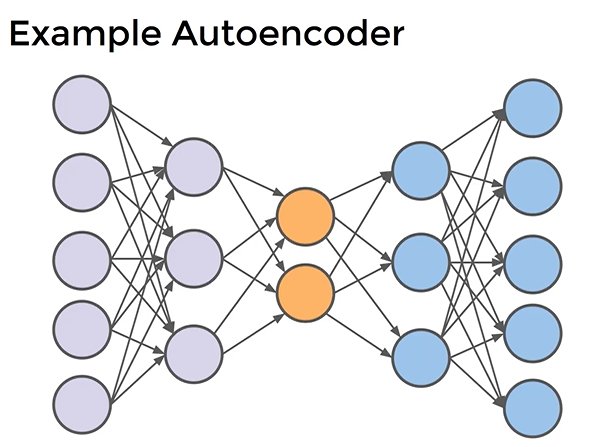

In [5]:
# The hidden layer learns which features are the most important as we reduce the dimensionality
# and it kind of takes like 10% from 1st feature 35% from second feature similarly to give us a 
# compressed format for our features. 
# we can use autoencoders for a variety of casses like: -
# like Denoising
# feature compression, anomaly detection, all makes use of the same thing.

# Dimensionality Reduction: -

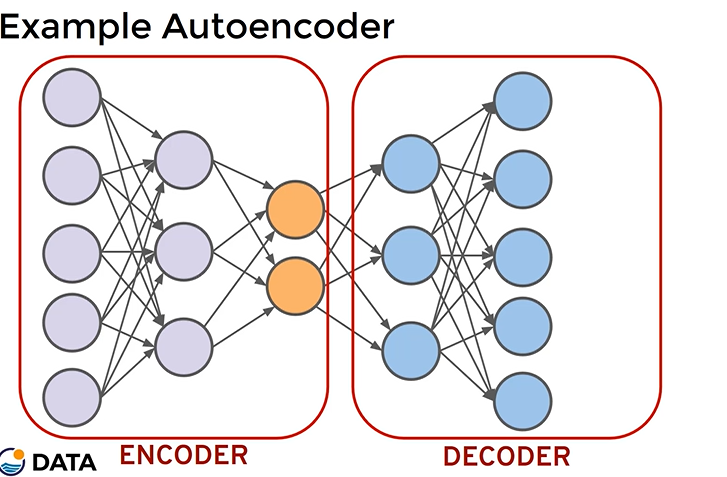



In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_blobs

In [7]:
data = make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.0,random_state=101)

In [8]:
x,y=data 

In [19]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(x))

In [20]:
feat = pd.DataFrame(x) 
z_noise=pd.Series(z_noise)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns=['X1','X2','X3']

In [22]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


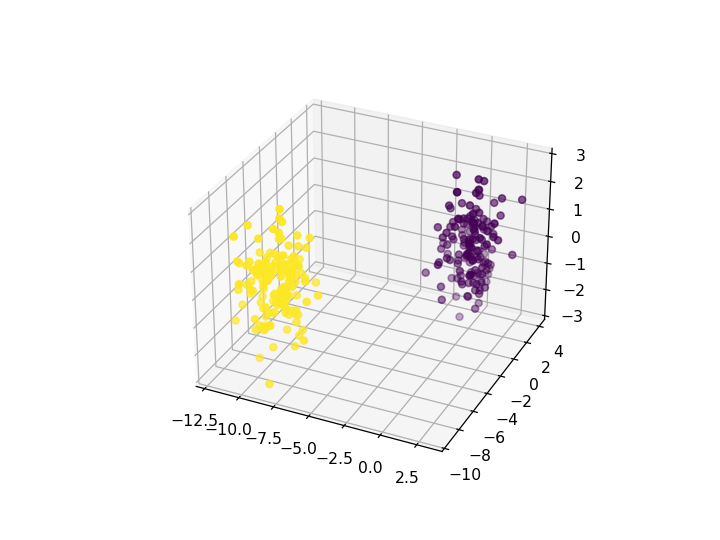

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)
# X3 is just noise that's why we are not seeing it 

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD# stochastic gradient descent
# We are creating an encoder based of the given architecture 
# 3-->2--->3

In [49]:
encoder= Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [50]:
decoder= Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape =[2]))

In [51]:
autoencoder = Sequential([encoder,decoder])

In [52]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=1.5))

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler= MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [55]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 886us/step - loss: 0.2613
Epoch 2/5
10/10 [==============================] - 0s 750us/step - loss: 0.2207
Epoch 3/5
10/10 [==============================] - 0s 777us/step - loss: 0.2180
Epoch 4/5
10/10 [==============================] - 0s 664us/step - loss: 0.2168
Epoch 5/5
10/10 [==============================] - 0s 664us/step - loss: 0.2261


In [56]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 665us/step


In [57]:
encoded_2dim.shape
# We hvae successfully reduced the 3 dimnesional data to dimension

(300, 2)

# Autoencoders for Images.

In [71]:
# Attempt to create input images in output and remove noise from the images

In [72]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)= mnist.load_data()

In [73]:
X_train=X_train/255
X_test=X_test/255

In [91]:
# We will create a stcked autoencoder.
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [92]:
decoder=Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid')) 
decoder.add(Reshape([28,28]))

In [96]:
autoencoder=Sequential([encoder,decoder])
# we use bianry cross entropy, as we are just focused on whether the created image matches the input image or not. 
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=['accuracy'])

In [114]:
autoencoder.fit(X_train,X_train,epochs=20,validation_data=[X_test,X_test],batch_size=1)

Epoch 1/20
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2499 - accuracy: 0.0724 - val_loss: 0.2422 - val_accuracy: 0.0851
Epoch 2/20
60000/60000 [==============================] - 110s 2ms/step - loss: 0.2323 - accuracy: 0.0990 - val_loss: 0.2174 - val_accuracy: 0.1117
Epoch 3/20
60000/60000 [==============================] - 102s 2ms/step - loss: 0.2074 - accuracy: 0.1238 - val_loss: 0.1884 - val_accuracy: 0.1505
Epoch 4/20
60000/60000 [==============================] - 159s 3ms/step - loss: 0.1758 - accuracy: 0.1647 - val_loss: 0.1664 - val_accuracy: 0.1724
Epoch 5/20
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1619 - accuracy: 0.1837 - val_loss: 0.1547 - val_accuracy: 0.1913
Epoch 6/20
60000/60000 [==============================] - 103s 2ms/step - loss: 0.1526 - accuracy: 0.1957 - val_loss: 0.1483 - val_accuracy: 0.1963
Epoch 7/20
60000/60000 [==============================] - 106s 2ms/step - loss: 0.1470 - accuracy: 0.2043 - val_

In [128]:
passed_image=autoencoder.predict(X_test[:5])

1/1 [==============================] - 0s 15ms/step


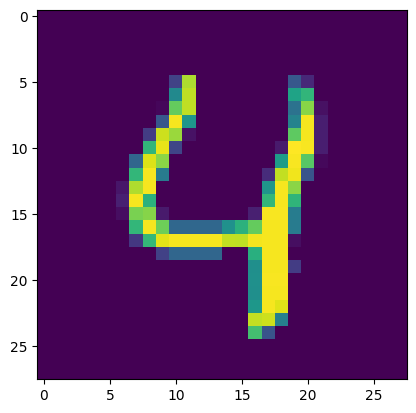

In [130]:
plt.imshow(X_test[4]) # original image
%matplotlib inline

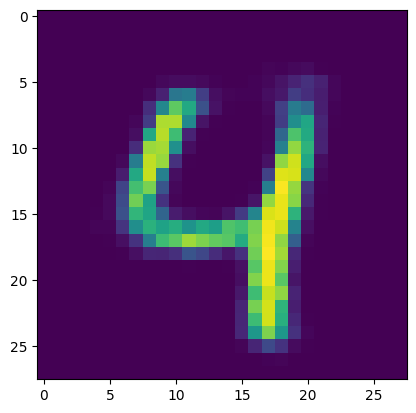

In [131]:
plt.imshow(passed_image[4])

In [112]:
# As we can see that we need to train the model more for better results altogether.